In [8]:
import pandas as pd
import numpy as np

# STEP 1: Load Raw Data
df = pd.read_csv('../data/raw/BrentOilPrices.csv')
df['Date'] = pd.to_datetime(df['Date'], format='mixed')

# 2. Set the index and make sure it replaces the old one (inplace=True)
df.set_index('Date', inplace=True)

# 3. Now try the year/month extraction again
df['Year'] = df.index.year
df['Month'] = df.index.month

# A. Initial Inspection

In [9]:
print(df.info())
print(df.describe())
print(f"Missing values:\n{df.isnull().sum()}")

<class 'pandas.DataFrame'>
DatetimeIndex: 9011 entries, 1987-05-20 to 2022-11-14
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   9011 non-null   float64
 1   Year    9011 non-null   int32  
 2   Month   9011 non-null   int32  
dtypes: float64(1), int32(2)
memory usage: 211.2 KB
None
             Price         Year        Month
count  9011.000000  9011.000000  9011.000000
mean     48.420782  2004.612030     6.554433
std      32.860110    10.260414     3.417784
min       9.100000  1987.000000     1.000000
25%      19.050000  1996.000000     4.000000
50%      38.570000  2005.000000     7.000000
75%      70.090000  2014.000000    10.000000
max     143.950000  2022.000000    12.000000
Missing values:
Price    0
Year     0
Month    0
dtype: int64


# B. Visualizing the Price History

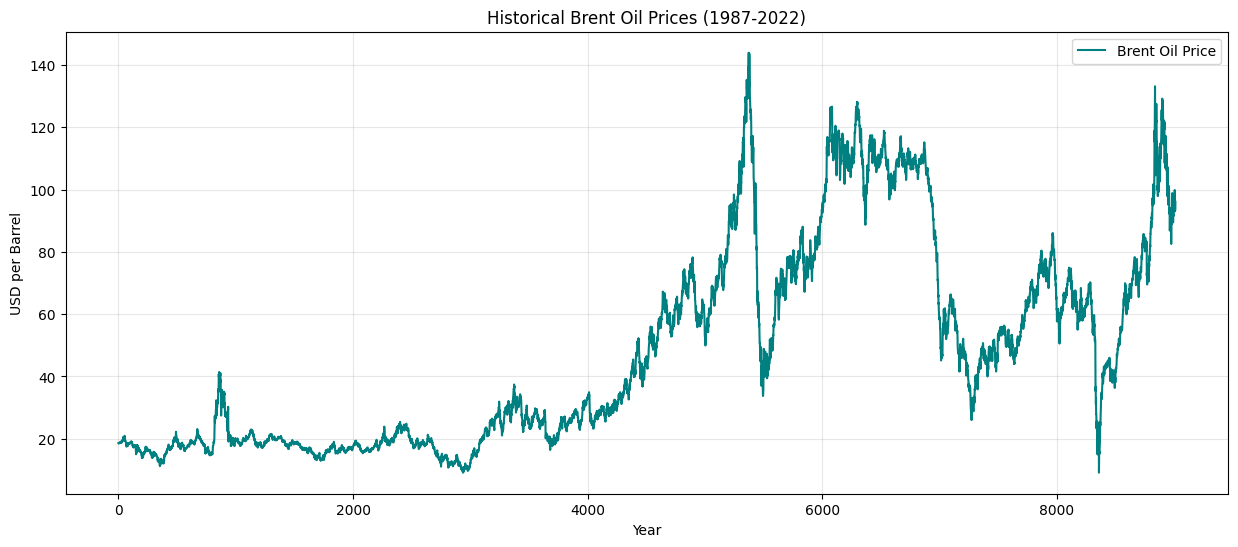

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
plt.plot(df.index, df['Price'], label='Brent Oil Price', color='teal')
plt.title('Historical Brent Oil Prices (1987-2022)')
plt.xlabel('Year')
plt.ylabel('USD per Barrel')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# C. Identifying Outliers and Volatility

Text(0.5, 1.0, 'Visualizing Price Outliers')

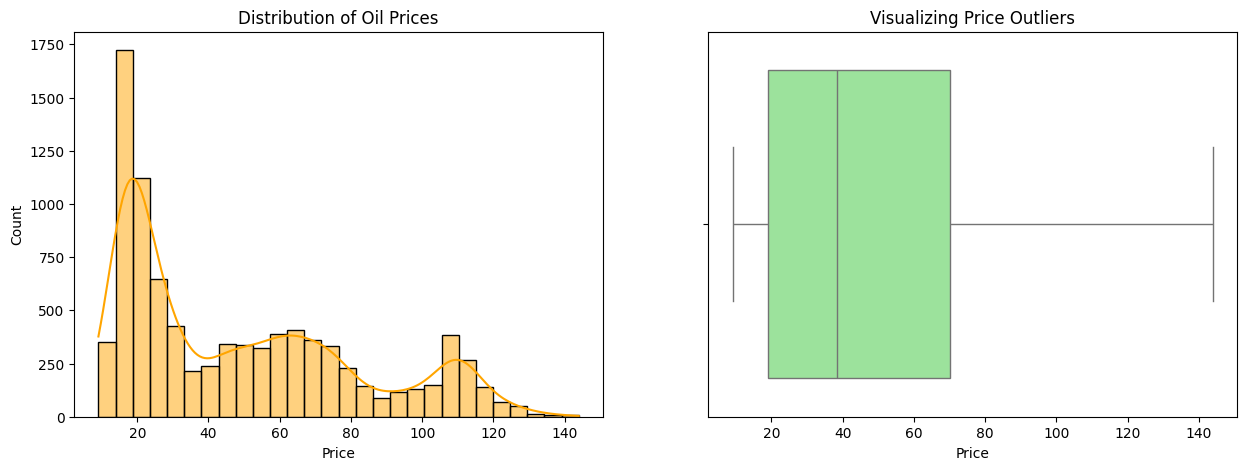

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Distribution of Prices
sns.histplot(df['Price'], kde=True, ax=axes[0], color='orange')
axes[0].set_title('Distribution of Oil Prices')

# Boxplot to see outliers
sns.boxplot(x=df['Price'], ax=axes[1], color='lightgreen')
axes[1].set_title('Visualizing Price Outliers')

# D. Checking for "Seasonality"

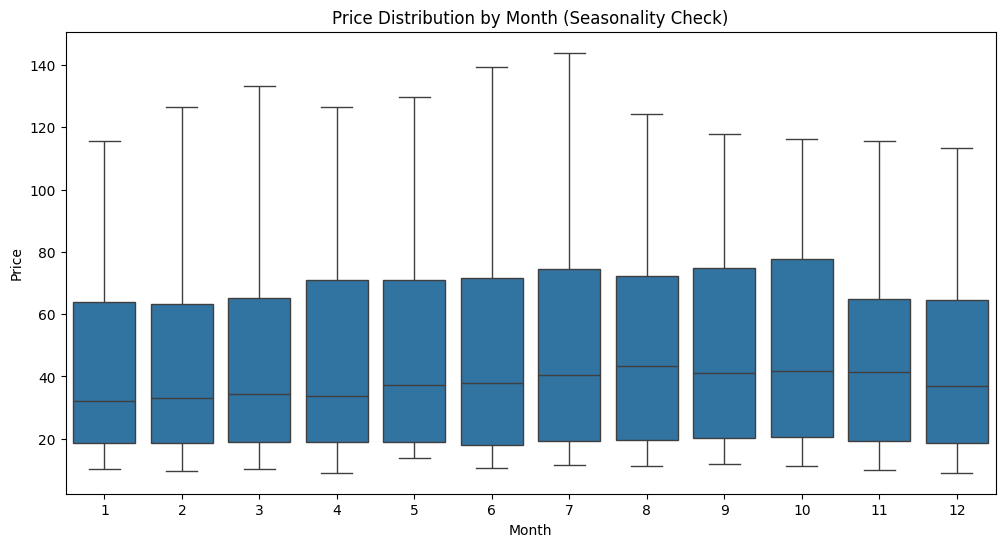

In [10]:
df['Year'] = df.index.year
df['Month'] = df.index.month

plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Price', data=df)
plt.title('Price Distribution by Month (Seasonality Check)')
plt.show()

# save processed data

In [11]:
# Calculate Log Returns for the Change Point Analysis
df['Log_Return'] = np.log(df['Price'] / df['Price'].shift(1))

# Drop the first row which will be NaN after the shift
df_clean = df.dropna()

# Save this for Task 2
df_clean.to_csv('../data/processed/brent_processed.csv')